<a href="https://colab.research.google.com/github/mondor705/machine-lerning/blob/main/glassclasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Cargar datos
data = np.loadtxt(('/content/gdrive/MyDrive/glass.csv'), delimiter=',', skiprows=1)
X = data[:, :10]
y = data[:, 9]
m = y.size

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]','X[:,2 ]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]', 'y'))
print('-'*70)
for i in range(100):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1],X[i,2],X[i,3],X[i,4],X[i,5],X[i,6],X[i,7],X[i,8],X[i,9], y[i]))

  X[:,0] X[:, 1] X[:,2 ] X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8] X[:, 9]         y
----------------------------------------------------------------------
       2      14       4       1      72       0       9       0       0       1         1
       2      14       4       1      73       0       8       0       0       1         1
       2      14       4       2      73       0       8       0       0       1         1
       2      13       4       1      73       1       8       0       0       1         1
       2      13       4       1      73       1       8       0       0       1         1
       2      13       4       2      73       1       8       0       0       1         1
       2      13       4       1      73       1       8       0       0       1         1
       2      13       4       1      73       1       8       0       0       1         1
       2      14       4       1      72       1       8       0       0       1         1
       2      13   

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 1.52101 13.64     4.49    ...  0.       0.       1.     ]
 [ 1.51761 13.89     3.6     ...  0.       0.       1.     ]
 [ 1.51618 13.53     3.55    ...  0.       0.       1.     ]
 ...
 [ 1.52065 14.36     0.      ...  1.64     0.       7.     ]
 [ 1.51651 14.38     0.      ...  1.57     0.       7.     ]
 [ 1.51711 14.23     0.      ...  1.67     0.       7.     ]]
Media calculada: [1.51836542e+00 1.34078505e+01 2.68453271e+00 1.44490654e+00
 7.26509346e+01 4.97056075e-01 8.95696262e+00 1.75046729e-01
 5.70093458e-02 2.78037383e+00]
Desviación estandar calculada: [0.00302976 0.81469337 1.43903379 0.49810176 0.77273399 0.65066625
 1.41982447 0.49605617 0.09721077 2.09881761]
[[ 0.87286765  0.28495326  1.25463857 ... -0.35287683 -0.5864509
  -0.84827468]
 [-0.24933347  0.59181718  0.63616803 ... -0.35287683 -0.5864509
  -0.84827468]
 [-0.72131806  0.14993314  0.60142249 ... -0.35287683 -0.5864509
  -0.84827468]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ...  2.95320036 -0.5864509
   

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.          0.87286765  0.28495326 ... -0.35287683 -0.5864509
  -0.84827468]
 [ 1.         -0.24933347  0.59181718 ... -0.35287683 -0.5864509
  -0.84827468]
 [ 1.         -0.72131806  0.14993314 ... -0.35287683 -0.5864509
  -0.84827468]
 ...
 [ 1.          0.75404635  1.16872135 ...  2.95320036 -0.5864509
   2.01047778]
 [ 1.         -0.61239854  1.19327046 ...  2.81208731 -0.5864509
   2.01047778]
 [ 1.         -0.41436305  1.00915211 ...  3.01367739 -0.5864509
   2.01047778]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.26471342 -0.02814036  0.09083395 -0.13533209  0.10698266  0.02768407
 -0.0023448   0.00204737  0.10221068 -0.03317444  0.18546484]


ValueError: ignored

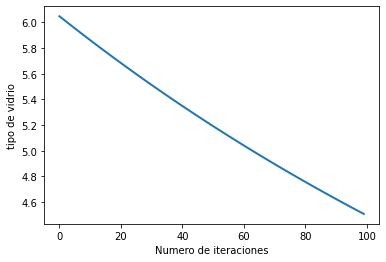

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('tipo de vidrio')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el Indice de Reflexion de un vidrio segun los materiales que contiene
X_array = [1,1.84, 12.8, 5,2,72.88,0.5,9,0.65,0.54]
X_array[0:10] = (X_array[0:10] - mu) / sigma
RI = np.dot(X_array, theta)   # Se debe cambiar esto

print('El tipo de vidrio predecido para un vidrio de 1.84 de indice de reflexion, 12.8 %Na, 5%Mg,2%Al, 72.88 % Si, 0.5% K, 9 % Ca, 0.65% Ba y 0.54% Fe(usando el descenso por el gradiente) es de tipo: {:.0f}'.format(RI))

In [ ]:
X_array = [1,1.84, 12.8, 5,2,72.88,0.5,9,0.65,0.54]
X_array[0:10] = (X_array[0:10] - mu) / sigma

In [ ]:
X_array[1:10]

[-14.199023709522521,
 7.029346623010614,
 7.1372834441997,
 -91.42982651448781,
 111.24435006591021,
 -5.956343761609861,
 17.790229718044287,
 6.100050772317998,
 -1.0674456977512186]

In [ ]:
# Cargar datos
data = np.loadtxt(('/content/gdrive/MyDrive/glass.csv'), delimiter=',', skiprows=1)
X = data[:, :10]
y = data[:, 9]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [ ]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,1.84, 12.8, 5,2,72.88,0.5,9,0.65,0.54]
RI = np.dot(X_array, theta) 

print('El tipo de vidrio predecido para un vidrio de 1.84 de indice de reflexion, 12.8 %Na, 5%Mg,2%Al, 72.88 % Si, 0.5% K, 9 % Ca, 0.65% Ba y 0.54% Fe(usando el descenso por el gradiente) es de tipo: {:.0f}'.format(RI))

Theta calculado a partir de la ecuación de la normal: [ 1.19898669e-09 -1.18514976e-09  3.11606296e-12  6.28597174e-12
  2.80164780e-12  5.91293681e-12  4.93977081e-12  5.51059198e-12
  6.46194209e-12  2.78162215e-12  1.00000000e+00]


ValueError: ignored